# Imports

In [1]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import warnings
import data_func.read_data as read_data
warnings.filterwarnings("ignore", category=FutureWarning, module="xgboost")


# Load datasets

In [2]:
dataframes = read_data.get_training_data()
X_frames_train = dataframes[0]
Y_frames_train = dataframes[1]
X_frames_test = read_data.get_test_data()


In [3]:
XTRA = X_frames_train[0]
XTRB = X_frames_train[1]
XTRC = X_frames_train[2]

YA = Y_frames_train[0]
YB = Y_frames_train[1]
YC = Y_frames_train[2]

In [4]:
X_frames_train[0].head()

,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,...,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
0,2019-06-02 22:00:00,7.7,1.230,1744.900024,0.0,0.0,1744.900024,0.0,280.299988,0.0,...,342.834015,-3.202,0.0,285.899994,100.0,39640.101562,3.7,-3.6,-0.8,-0.0
1,2019-06-02 22:15:00,7.7,1.229,1734.000000,0.0,0.0,1734.000000,0.0,280.299988,0.0,...,346.294006,-3.650,0.0,286.100006,100.0,40123.898438,3.6,-3.6,-0.6,-0.0
2,2019-06-02 22:30:00,7.7,1.228,1723.500000,0.0,0.0,1723.500000,0.0,280.299988,0.0,...,349.768005,-3.998,0.0,286.299988,100.0,40628.300781,3.6,-3.6,-0.4,-0.0
3,2019-06-02 22:45:00,7.7,1.226,1713.400024,0.0,0.0,1713.400024,0.0,280.299988,0.0,...,353.251007,-4.247,0.0,286.600006,100.0,41153.601562,3.5,-3.5,-0.2,-0.0
4,2019-06-02 23:00:00,7.7,1.225,1703.599976,0.0,0.0,1703.599976,0.0,280.299988,0.0,...,356.742004,-4.393,0.0,286.799988,100.0,41699.898438,3.5,-3.5,0.0,-0.0


Found a hole in the X data on location A

1|2
---|---
![1](./feature_cleaning/img/X_A_1.png) | ![2](./feature_cleaning/img/X_A_2.png)

This prevents our aggregation method to match the target data after these data points

Trying to remove this point and reindex to fix the issue. 

In [5]:
print(len(XTRA))
ind = XTRA[(XTRA['date_forecast'] == pd.to_datetime('2022-10-21 01:00:00'))].index
print(ind)
XTRA.drop(ind, inplace=True)
print(len(XTRA))

136245
Int64Index([118668], dtype='int64')
136244


## Cleaning Y-data

### B targets:

Start | End
--- | ---
2019-03-24 00:00:00 | 2019-03-28 00:00:00
2019-05-31 00:00:00 | 2019-06-03 14:00:00
2019-10-28 14:00:00 | 2019-10-30 23:00:00
2020-02-23 17:00:00 | 2020-03-06 06:00:00
2020-03-26 14:00:00 | 2020-03-27 22:00:00
2020-04-02 03:00:00 | 2020-04-16 08:00:00
2020-07-12 23:00:00 | 2020-08-25 23:00:00
2020-09-24 14:00:00 | 2020-09-25 23:00:00
2021-01-15 10:00:00 | 2021-04-19 09:00:00
2021-04-29 00:00:00 | 2021-05-01 23:00:00
2021-06-05 03:00:00 | 2021-06-07 08:00:00
2021-06-13 04:00:00 | 2021-06-14 10:00:00
2021-06-22 03:00:00 | 2021-06-24 08:00:00
2021-07-03 15:00:00 | 2021-07-06 07:00:00
2021-08-26 00:00:00 | 2021-09-03 22:00:00
2021-09-08 15:00:00 | 2021-09-14 13:00:00
2021-09-19 02:00:00 | 2021-09-27 10:00:00
2021-01-30 15:00:00 | 2022-02-04 09:00:00
2022-02-10 21:00:00 | 2022-02-13 07:00:00
2022-02-16 14:00:00 | 2022-02-24 06:00:00
2022-03-19 15:00:00 | 2022-04-13 06:00:00
2022-12-05 17:00:00 | 2023-01-05 08:00:00
2023-02-24 01:00:00 | 2023-02-27 05:00:00
2023-03-07 10:00:00 | 2023-03-10 01:00:00
2023-03-25 23:00:00 | 2023-03-28 02:00:00

### C-targets:

Start | End
---|---
2020-02-23 17:00:00 | 2020-03-08 08:00:00

In [6]:
print(len(YB))

32848


[]
[635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 707, 708, 709, 710, 711, 712, 713, 1348, 1349, 1350, 1351, 1352, 3093, 3094, 3095, 3096, 3097, 3098, 3099, 3100, 3607, 3608, 3609, 3610, 3611, 3612, 3613, 3614, 3615, 3616, 3617, 3618, 3619, 3620, 3621, 3622, 3623, 3624, 3625, 3626, 3627, 3628, 3629, 3630, 3631, 3632, 3633, 3634, 3635, 3636, 3637, 3638, 3639, 3640, 3641, 3642, 3643, 3644, 3645, 3646, 3647, 3648, 3649, 3650, 3651, 3652, 3653, 3654, 3655, 3656, 3657, 3658, 3659, 3660, 3661, 3662, 3663, 3664, 3665, 3666, 3667, 3668, 3669, 3670, 3671, 3672, 3673, 3674, 3675, 3676, 3677, 3678, 3679, 3680, 3681, 3682, 3683, 3684, 7211, 7212, 7213, 7214, 7215, 7216, 7217, 7218, 7219, 7220, 7221, 7222, 7223, 7224, 7225, 7226, 7227, 7228, 7229, 7230, 7231, 7232, 7233, 7234, 7235, 7236, 7237, 7238, 7239, 7240, 7241, 7242, 7243, 7244, 7245, 7246, 7247, 7248, 7249, 7250, 7251, 7252, 7253, 7254, 7255, 7256,

<Axes: title={'center': 'Target C Clean'}, xlabel='time'>

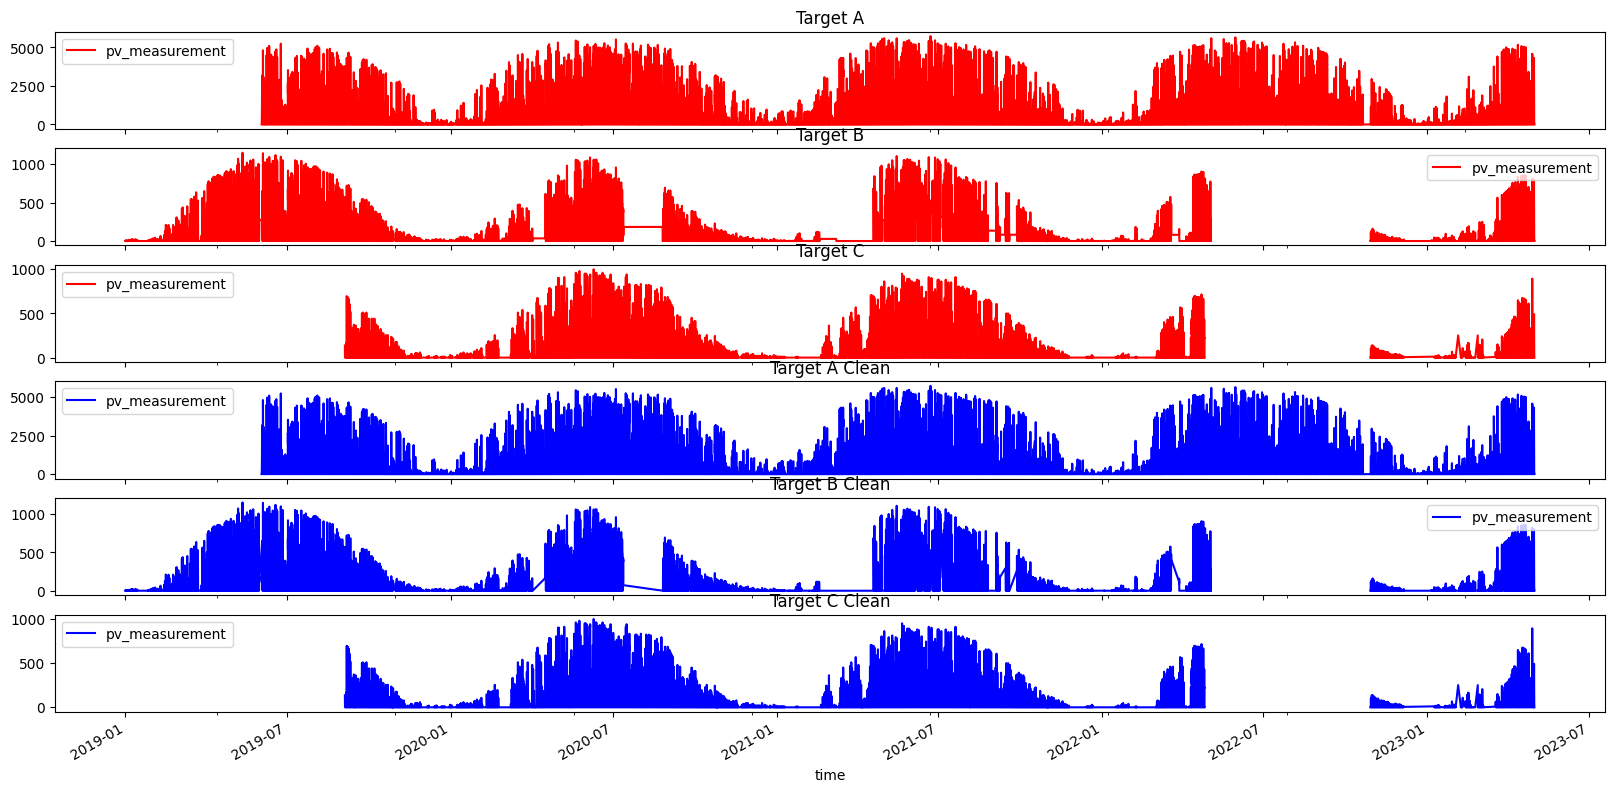

In [7]:
def fix_y_holes(y: pd.DataFrame) -> pd.DataFrame:
    Y = y
    drop_val = None
    index_dropper = []
    for i in range(1, len(Y)-4):
        if Y['pv_measurement'].iloc[i] != 0:
            if (Y['pv_measurement'].iloc[i] == Y['pv_measurement'].iloc[i+1] and Y['pv_measurement'].iloc[i+1] == Y['pv_measurement'].iloc[i+2] and Y['pv_measurement'].iloc[i+2] == Y['pv_measurement'].iloc[i+3]):
                drop_val = Y['pv_measurement'].iloc[i]
        if Y['pv_measurement'].iloc[i] == drop_val:
            index_dropper.append(i)
        else:
            if drop_val != None:
                drop_val = None
    print(index_dropper)
    return Y.drop(index_dropper)
    
import matplotlib.pylab as plt
fig, axs = plt.subplots(6, 1, figsize=(20, 10), sharex=True)
YA[['time', 'pv_measurement']].set_index('time').plot(ax=axs[0], title='Target A', color='red')
YB[['time', 'pv_measurement']].set_index('time').plot(ax=axs[1], title='Target B', color='red')
YC[['time', 'pv_measurement']].set_index('time').plot(ax=axs[2], title='Target C', color='red')


YA_clean = fix_y_holes(YA)
YB_clean = fix_y_holes(YB)
YC_clean = fix_y_holes(YC)

YA_clean[['time', 'pv_measurement']].set_index('time').plot(ax=axs[3], title='Target A Clean', color='blue')
YB_clean[['time', 'pv_measurement']].set_index('time').plot(ax=axs[4], title='Target B Clean', color='blue')
YC_clean[['time', 'pv_measurement']].set_index('time').plot(ax=axs[5], title='Target C Clean', color='blue')



before B drop:  32848
after B drop:  20628
before C drop:  32155
after C drop:  31827


<Axes: title={'center': 'Target C Clean'}, xlabel='time'>

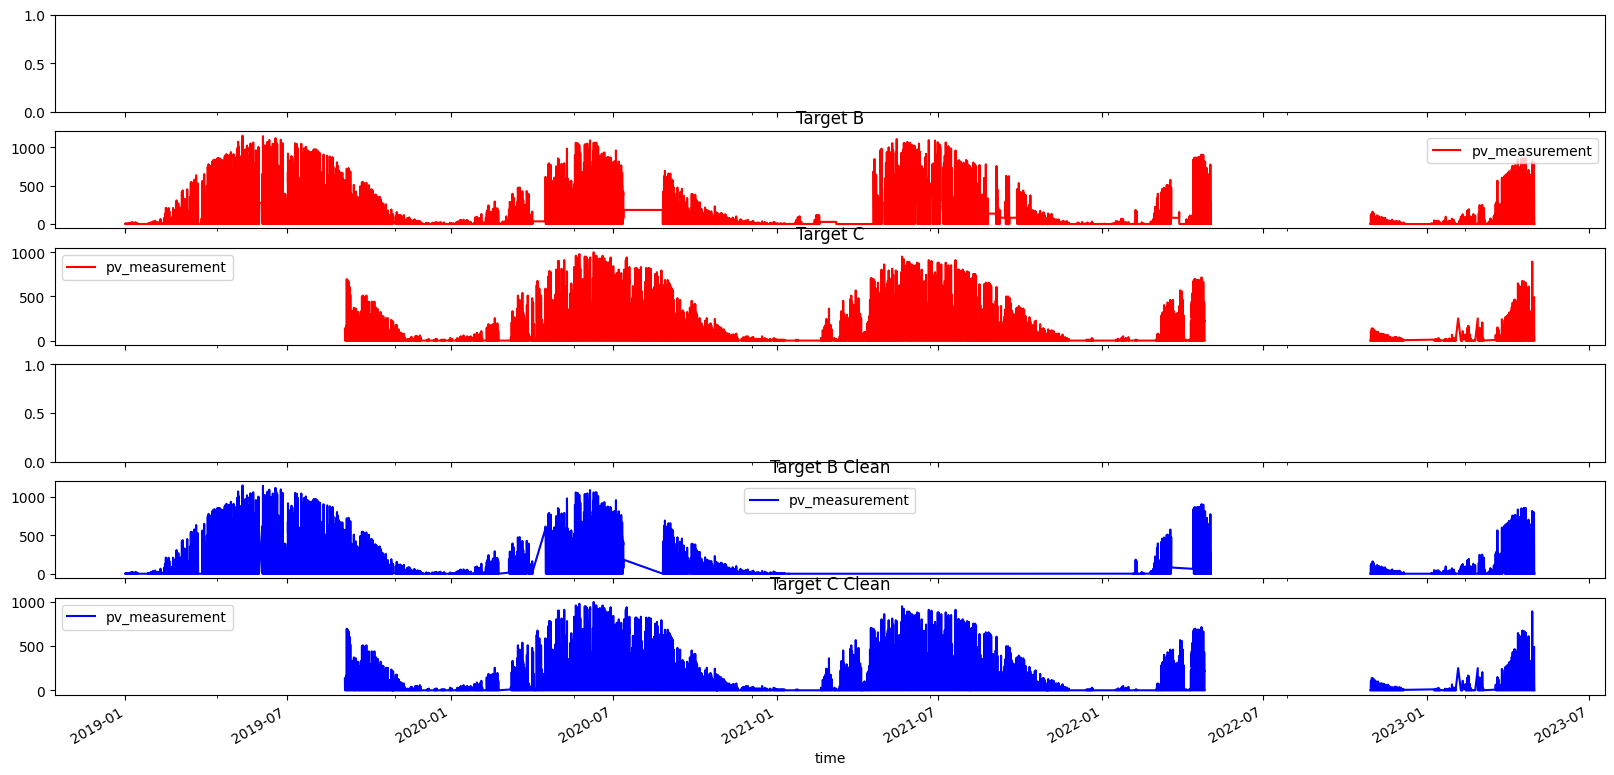

In [6]:
start_times_b = [
    '2019-03-24 00:00:00',
'2019-05-31 00:00:00',
'2019-10-28 14:00:00',
'2020-02-23 17:00:00',
'2020-03-26 14:00:00',
'2020-04-02 03:00:00',
'2020-07-12 23:00:00',
'2020-09-24 14:00:00',
'2021-01-15 10:00:00',
'2021-04-29 00:00:00',
'2021-06-05 03:00:00',
'2021-06-13 04:00:00',
'2021-06-22 03:00:00',
'2021-07-03 15:00:00',
'2021-08-26 00:00:00',
'2021-09-08 15:00:00',
'2021-09-19 02:00:00',
'2021-01-30 15:00:00',
'2022-02-10 21:00:00',
'2022-02-16 14:00:00',
'2022-03-19 15:00:00',
'2022-12-05 17:00:00',
'2023-02-24 01:00:00',
'2023-03-07 10:00:00',
'2023-03-25 23:00:00'
]

end_times_b = [
    '2019-03-28 00:00:00',
'2019-06-03 14:00:00',
'2019-10-30 23:00:00',
'2020-03-06 06:00:00',
'2020-03-27 22:00:00',
'2020-04-16 08:00:00',
'2020-08-25 23:00:00',
'2020-09-25 23:00:00',
'2021-04-19 09:00:00',
'2021-05-01 23:00:00',
'2021-06-07 08:00:00',
'2021-06-14 10:00:00',
'2021-06-24 08:00:00',
'2021-07-06 07:00:00',
'2021-09-03 22:00:00',
'2021-09-14 13:00:00',
'2021-09-27 10:00:00',
'2022-02-04 09:00:00',
'2022-02-13 07:00:00',
'2022-02-24 06:00:00',
'2022-04-13 06:00:00',
'2023-01-05 08:00:00',
'2023-02-27 05:00:00',
'2023-03-10 01:00:00',
'2023-03-28 02:00:00'
]

print("before B drop: ", len(YB))
import matplotlib.pylab as plt
fig, axs = plt.subplots(6, 1, figsize=(20, 10), sharex=True)
YB[['time', 'pv_measurement']].set_index('time').plot(ax=axs[1], title='Target B', color='red')
YC[['time', 'pv_measurement']].set_index('time').plot(ax=axs[2], title='Target C', color='red')




for i in range(len(start_times_b)):
    a = pd.to_datetime(start_times_b[i])
    b = pd.to_datetime(end_times_b[i])
    ind = YB[ (YB['time'] >= a) & (YB['time'] <= b)].index
    
    YB.drop(ind, inplace=True)

print("after B drop: ", len(YB))

print("before C drop: ", len(YC))

a = pd.to_datetime("2020-02-23 17:00:00")
b = pd.to_datetime('2020-03-08 08:00:00')
ind = YC[ (YC['time'] >= a) & (YC['time'] <= b)].index
    
YC.drop(ind, inplace=True)
print("after C drop: ", len(YC))

YB[['time', 'pv_measurement']].set_index('time').plot(ax=axs[4], title='Target B Clean', color='blue')
YC[['time', 'pv_measurement']].set_index('time').plot(ax=axs[5], title='Target C Clean', color='blue')

# Data Aggregation

In [5]:
# making shure that target values line up with x_values
import data_func.aggregation as data_agg

categorical_col = ['dew_or_rime:idx', 'precip_type_5min:idx', 'is_day:idx', 'is_in_shadow:idx']

def aggregate_correct_x(x: pd.DataFrame) -> pd.DataFrame:
   '''
   Takes a given dataframe and returns an aggregated dataframe based on selected categorical functions. 
   Assumes grouping of 4.
   '''
   categorical = x[["date_forecast"] + categorical_col]
   mean = x.drop(columns=categorical_col)

   categorical = data_agg.gen_agg(categorical, agg_type=data_agg.stocastic_median, merge_on = 'first')
   mean = data_agg.gen_agg(mean, "mean", merge_on = 'first')

   return pd.merge(categorical, mean, on="date_forecast")

def data_allign(x_train, y_train):

  y_train.dropna(inplace=True)
  x_train = aggregate_correct_x(x_train)
  combined_data = pd.merge(x_train, y_train, left_on='date_forecast', right_on='time')
  y_train = combined_data['pv_measurement']

  if 'time' and 'pv_measurement' in combined_data.columns:
    combined_data.drop(columns=['time', 'pv_measurement'], inplace=True)
    
  return combined_data, y_train



X_train = [XTRA, XTRB, XTRC]
Y_train = [YA, YB, YC]

for i in range(len(X_train)):
    X_train[i], Y_train[i] = data_allign(X_train[i], Y_train[i])

for j in range(len(X_frames_test)):
    X_frames_test[j] = aggregate_correct_x(X_frames_test[j])




In [10]:
X_train[0].tail()

,date_forecast,dew_or_rime:idx,precip_type_5min:idx,is_day:idx,is_in_shadow:idx,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,...,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
29662,2022-10-20 20:00:00,0,0,0,1,5.800,1.2805,1291.5,0.0,0.0,...,313.254761,-29.704250,0.0,278.250000,47.050003,40105.472656,1.925,0.475,1.850,0.0
29663,2022-10-20 21:00:00,0,0,0,1,5.575,1.2840,NaN,0.0,0.0,...,329.987762,-33.860748,0.0,277.850006,19.500000,39001.398438,1.675,0.250,1.675,0.0
29664,2022-10-20 22:00:00,0,0,0,1,5.350,1.2870,NaN,0.0,0.0,...,347.845490,-36.270000,0.0,277.475006,9.700000,35336.726562,1.400,0.050,1.400,0.0
29665,2022-10-20 23:00:00,0,0,0,1,5.200,1.2905,NaN,0.0,0.0,...,96.250496,-36.614998,0.0,277.149994,4.525000,27164.625000,1.300,-0.175,1.300,0.0
29666,2022-10-21 00:00:00,0,0,0,1,5.000,1.2920,NaN,0.0,0.0,...,23.331749,-35.368500,0.0,276.700012,1.975000,29933.000000,1.400,-0.700,1.175,0.0


In [6]:
#Verify length matches
for x in range(len(X_train)):
    print("x,y: ", len(X_train[x]), len(Y_train[x]))



x,y:  29667 29667
x,y:  17161 17161
x,y:  22813 22813


# Feature engineering

In [7]:
import data_func.timeseasonality as DTS
import data_func.one_hot_encoding as OHE
for i in range(len(X_train)):
    X_train[i] = DTS.append_seasonal_columns(X_train[i])
    

for i in range(len(X_frames_test)):
    X_frames_test[i] = DTS.append_seasonal_columns(X_frames_test[i])
    

# THIS SECTION CAN ONLY WORK IF THE PREVIOUS AGGREGATION IS DONE INDIVIDUALLY FOR CATEGORICAL DATA
# import data_func.one_hot_encoding as OHE

def fix_categorical(train: pd.DataFrame, test: pd.DataFrame):
     temp = train.append(test, ignore_index = True)
     index_train = temp[(temp['date_forecast'] < test['date_forecast'].iloc[0])].index
     return temp.drop(index_train)

OH_columns = ['dew_or_rime:idx', 'precip_type_5min:idx']

for i in range(len(X_frames_test)):
     X_train[i] = OHE.one_hot_encode(X_train[i],OH_columns)
     X_frames_test[i] = OHE.one_hot_encode(X_frames_test[i], OH_columns)
     X_frames_test[i] = fix_categorical(X_train[i], X_frames_test[i])
     X_train[i].drop(columns=['date_forecast'], inplace=True)
     X_frames_test[i].drop(columns=['date_forecast'], inplace=True)


/var/folders/94/wm45lcfj7sv746_0rnyvdk840000gn/T/ipykernel_46780/3188492942.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp = train.append(test, ignore_index = True)
/var/folders/94/wm45lcfj7sv746_0rnyvdk840000gn/T/ipykernel_46780/3188492942.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp = train.append(test, ignore_index = True)
/var/folders/94/wm45lcfj7sv746_0rnyvdk840000gn/T/ipykernel_46780/3188492942.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp = train.append(test, ignore_index = True)


## Data Cleaning

In [8]:
# Show null values for all training sets

count_a = X_train[0].isna().sum()
count_b = X_train[1].isna().sum()
count_c = X_train[2].isna().sum()

count_a.rename("A", inplace=True)
count_b.rename("B", inplace=True)
count_c.rename("C", inplace=True)

df = pd.merge(count_a, count_b, left_index=True, right_index=True)
df = pd.merge(df, count_c, left_index=True, right_index=True)

df[(df['A'] != 0) | (df['B'] != 0) | (df['C'] != 0)]

,A,B,C
ceiling_height_agl:m,4986,2026,4350
cloud_base_agl:m,1612,932,1688
snow_density:kgm3,28527,15871,21400


In [9]:
# Show null values for all test sets

count_a = X_frames_test[0].isna().sum()
count_b = X_frames_test[1].isna().sum()
count_c = X_frames_test[2].isna().sum()

count_a.rename("A", inplace=True)
count_b.rename("B", inplace=True)
count_c.rename("C", inplace=True)

df = pd.merge(count_a, count_b, left_index=True, right_index=True)
df = pd.merge(df, count_c, left_index=True, right_index=True)

df[(df['A'] != 0) | (df['B'] != 0) | (df['C'] != 0)]

,A,B,C
ceiling_height_agl:m,188,180,202
cloud_base_agl:m,70,65,88
snow_density:kgm3,720,720,720
dew_or_rime:idx_-1,720,720,0
precip_type_5min:idx_2,720,720,720
precip_type_5min:idx_3,720,720,720


In [10]:
# Removes nan or fills it
values = {"ceiling_height_agl:m": 20000, "cloud_base_agl:m": 20000}

for i in range(len(X_train)):
    X_train[i].drop(columns=['snow_density:kgm3', 'elevation:m'], inplace=True)
    X_frames_test[i].drop(columns=['snow_density:kgm3', 'elevation:m'], inplace=True)
    X_train[i].fillna(value=values, inplace=True)
    X_frames_test[i].fillna(value=values, inplace=True)
    X_frames_test[i].fillna(0, inplace=True) # fills remaining NaN vals with 0

## Removing snow from A

Suspect snow is not very relevant for A-set

In [11]:
X_train[0].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
is_day:idx,29667.0,0.471500,0.499196,0.000000,0.000000,0.000000e+00,1.000000,1.000000e+00
is_in_shadow:idx,29667.0,0.496174,0.499994,0.000000,0.000000,0.000000e+00,1.000000,1.000000e+00
absolute_humidity_2m:gm3,29667.0,6.379581,2.612027,0.700000,4.400000,5.975000e+00,8.100000,1.605000e+01
air_density_2m:kgm3,29667.0,1.252307,0.034827,1.145000,1.229000,1.251000e+00,1.274000,1.426250e+00
ceiling_height_agl:m,29667.0,5892.925781,6755.525879,27.849998,1337.474976,2.709600e+03,7267.025146,2.000000e+04
clear_sky_energy_1h:J,29667.0,565528.562500,825693.562500,0.000000,0.000000,4.782730e+04,959101.687500,2.988628e+06
clear_sky_rad:W,29667.0,157.091171,229.956268,0.000000,0.000000,1.325000e+01,273.575012,8.351000e+02
cloud_base_agl:m,29667.0,2738.403320,4501.368652,27.900000,625.787506,1.240525e+03,2381.612549,2.000000e+04
dew_point_2m:K,29667.0,276.139557,6.374989,251.074997,271.875000,2.760500e+02,280.924988,2.919500e+02
diffuse_rad:W,29667.0,42.953587,61.441681,0.000000,0.000000,6.162500e+00,72.262501,3.322750e+02


In [12]:
snow_columns = ["fresh_snow_12h:cm", 
                "fresh_snow_1h:cm",
                "fresh_snow_24h:cm",
                "fresh_snow_3h:cm",
                "fresh_snow_6h:cm",
                "snow_drift:idx",
                "snow_depth:cm",
                "snow_melt_10min:mm",
                "snow_water:kgm2"]

X_train[0].drop(columns=snow_columns, inplace=True)
X_frames_test[0].drop(columns=snow_columns, inplace=True)

X_frames_test[0].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
is_day:idx,720.0,7.736111e-01,4.187846e-01,0.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00
is_in_shadow:idx,720.0,2.236111e-01,4.169540e-01,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000e+00
absolute_humidity_2m:gm3,720.0,8.205903e+00,2.178425e+00,3.200000,6.693750,8.050000e+00,9.981250e+00,1.367500e+01
air_density_2m:kgm3,720.0,1.233150e+00,3.210283e-02,1.151000,1.209000,1.238625e+00,1.260000e+00,1.299750e+00
ceiling_height_agl:m,720.0,7.510068e+03,7.849354e+03,53.299999,1219.593781,3.261587e+03,2.000000e+04,2.000000e+04
clear_sky_energy_1h:J,720.0,1.227651e+06,1.101479e+06,0.000000,48799.869141,9.337900e+05,2.276145e+06,2.987530e+06
clear_sky_rad:W,720.0,3.410140e+02,3.069119e+02,0.000000,17.950000,2.995750e+02,6.617375e+02,8.349500e+02
cloud_base_agl:m,720.0,3.652147e+03,5.736650e+03,30.225000,540.268738,1.213675e+03,3.138106e+03,2.000000e+04
dew_point_2m:K,720.0,2.808002e+02,4.339592e+00,268.100006,278.024994,2.810500e+02,2.843812e+02,2.895500e+02
diffuse_rad:W,720.0,8.490232e+01,7.859020e+01,0.000000,8.087500,7.530000e+01,1.342313e+02,3.075000e+02


# Training the model

In [13]:
import tensorflow as tf

normalizer_A = tf.keras.layers.Normalization(axis=-1)
normalizer_A.adapt(X_train[0])

first = np.array(X_train[0][:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer_A(first).numpy())

normalizer_B = tf.keras.layers.Normalization(axis=-1)
normalizer_B.adapt(X_train[1])
normalizer_C = tf.keras.layers.Normalization(axis=-1)
normalizer_C.adapt(X_train[2])

First example: [[    0.       1.       8.02     1.23  2072.6      0.       0.    1731.95
    280.79     0.       0.       0.       0.      99.54  1003.45     0.
    990.9    996.91     0.       0.04    82.17  1002.97   347.93   -21.42
      0.     285.45   100.   30549.5      2.15    -1.95     0.07     0.
     -0.5      0.87     0.49    -0.87     0.       1.       0.       1.
      0.       0.       0.       0.  ]]

Normalized: [[-0.94  1.01  0.63 -0.62 -0.57 -0.68 -0.68 -0.22  0.73 -0.7  -0.71 -0.48
  -0.48  0.98 -0.49 -0.21 -0.47 -0.47 -0.09  0.61  0.61 -0.48  1.72 -0.93
  -0.56  0.86  0.8  -0.11 -0.53 -0.97 -0.27 -0.02 -0.71  1.22  0.77 -1.14
  -0.08  0.17 -0.15  0.24 -0.21 -0.06 -0.07 -0.01]]


In [14]:
def build_model(normalizer):
    model = tf.keras.Sequential([
        normalizer,
        tf.keras.layers.Dense(64, activation="relu", input_shape=[len(X_train[0].keys())]),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(1)
    ])
    optim = tf.keras.optimizers.RMSprop(0.001)
    model.compile(loss="mse", optimizer=optim, metrics=["mae", "mse"])

    return model

In [15]:
model_a = build_model(normalizer_A)
model_b = build_model(normalizer_B)
model_c = build_model(normalizer_C)

## -->EVALUATE<--

In [16]:
x_train_a, x_val_a, y_train_a, y_val_a = train_test_split(X_train[0], Y_train[0], test_size=0.17, random_state=None)
x_train_b, x_val_b, y_train_b, y_val_b = train_test_split(X_train[1], Y_train[1], test_size=0.17, random_state=None)
x_train_c, x_val_c, y_train_c, y_val_c = train_test_split(X_train[2], Y_train[2], test_size=0.17, random_state=None)

In [17]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history_a = model_a.fit(
    x_train_a,
    y_train_a,
    validation_split=0.2,
    epochs=1000, 
    callbacks=[early_stop])

history_b = model_b.fit(
    x_train_b,
    y_train_b,
    validation_split=0.2,
    epochs=1000, 
    callbacks=[early_stop])

history_c = model_c.fit(
    x_train_c,
    y_train_c,
    validation_split=0.2,
    epochs=1000, 
    callbacks=[early_stop])

Epoch 1/1000


616/616 [==============================] - 1s 675us/step - loss: 827718.3750 - mae: 426.3008 - mse: 827718.3750 - val_loss: 323577.9062 - val_mae: 298.0067 - val_mse: 323577.9062
Epoch 2/1000
616/616 [==============================] - 0s 528us/step - loss: 288048.7500 - mae: 275.7356 - mse: 288048.7500 - val_loss: 285208.5625 - val_mae: 272.4716 - val_mse: 285208.5625
Epoch 3/1000
616/616 [==============================] - 0s 529us/step - loss: 269297.1250 - mae: 260.3528 - mse: 269297.1250 - val_loss: 275190.1250 - val_mae: 262.1010 - val_mse: 275190.1250
Epoch 4/1000
616/616 [==============================] - 0s 526us/step - loss: 262152.1562 - mae: 254.8870 - mse: 262152.1562 - val_loss: 268795.0312 - val_mae: 257.2335 - val_mse: 268795.0312
Epoch 5/1000
616/616 [==============================] - 0s 525us/step - loss: 258029.4688 - mae: 251.3805 - mse: 258029.4688 - val_loss: 267108.6250 - val_mae: 256.6700 - val_mse: 267108.6250
Epoch 6/1000
616/616 [==============================]

In [18]:
import matplotlib.pyplot as plt

def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  #plt.ylim([0, 1000000])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

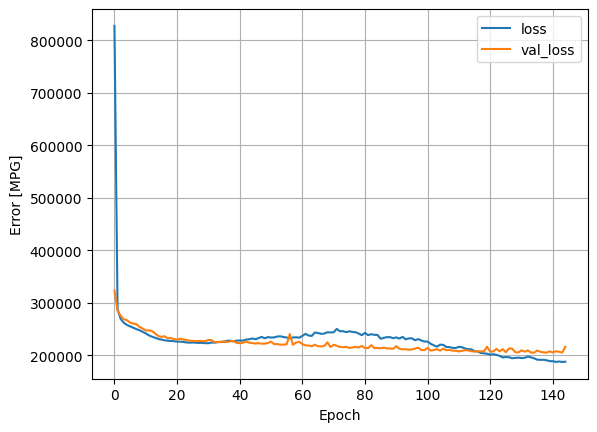

In [19]:
plot_loss(history_a)


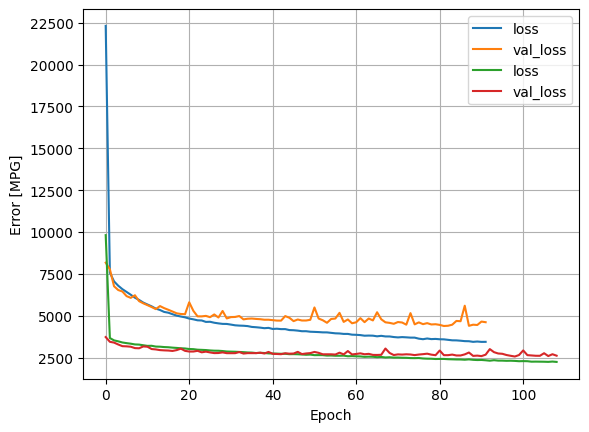

In [20]:
plot_loss(history_b)
plot_loss(history_c)

In [21]:
print(model_a.evaluate(x_val_a, y_val_a))
print(model_b.evaluate(x_val_b, y_val_b))
print(model_c.evaluate(x_val_c, y_val_c))

158/158 [==============================] - 0s 459us/step - loss: 219711.2969 - mae: 233.8929 - mse: 219711.2969
[219711.296875, 233.8928985595703, 219711.296875]
92/92 [==============================] - 0s 412us/step - loss: 4267.0557 - mae: 29.5386 - mse: 4267.0557
[4267.0556640625, 29.538618087768555, 4267.0556640625]
122/122 [==============================] - 0s 395us/step - loss: 2848.1785 - mae: 22.7018 - mse: 2848.1785
[2848.178466796875, 22.70179557800293, 2848.178466796875]


## --> ProperPrediction <--

In [22]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history_a = model_a.fit(
    X_train[0],
    Y_train[0],
    validation_split=0.2,
    epochs=1000, 
    callbacks=[early_stop])

history_b = model_b.fit(
    X_train[1],
    Y_train[1],
    validation_split=0.2,
    epochs=1000, 
    callbacks=[early_stop])

history_c = model_c.fit(
    X_train[2],
    Y_train[2],
    validation_split=0.2,
    epochs=1000, 
    callbacks=[early_stop])

Epoch 1/1000
742/742 [==============================] - 0s 597us/step - loss: 186055.7500 - mae: 206.0740 - mse: 186055.7500 - val_loss: 229939.8125 - val_mae: 251.1262 - val_mse: 229939.8125
Epoch 2/1000
742/742 [==============================] - 0s 630us/step - loss: 185191.0625 - mae: 205.4698 - mse: 185191.0625 - val_loss: 229184.2188 - val_mae: 251.5595 - val_mse: 229184.2188
Epoch 3/1000
742/742 [==============================] - 0s 542us/step - loss: 184520.0469 - mae: 205.2677 - mse: 184520.0469 - val_loss: 233105.6406 - val_mae: 258.3173 - val_mse: 233105.6406
Epoch 4/1000
742/742 [==============================] - 0s 566us/step - loss: 183772.5312 - mae: 204.6492 - mse: 183772.5312 - val_loss: 234450.5312 - val_mae: 254.9388 - val_mse: 234450.5312
Epoch 5/1000
742/742 [==============================] - 0s 549us/step - loss: 183863.6094 - mae: 204.3995 - mse: 183863.6094 - val_loss: 242090.2969 - val_mae: 264.6566 - val_mse: 242090.2969
Epoch 6/1000
742/742 [==================

# Make predictions

In [24]:
X_frames_test[0].describe()

,is_day:idx,is_in_shadow:idx,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_point_2m:K,diffuse_rad:W,...,cosinus_day,sinus_year,cosinus_year,dew_or_rime:idx_-1,dew_or_rime:idx_0,dew_or_rime:idx_1,precip_type_5min:idx_0,precip_type_5min:idx_1,precip_type_5min:idx_2,precip_type_5min:idx_3
count,720.000000,720.000000,720.000000,720.000000,539.000000,7.200000e+02,720.000000,654.000000,720.000000,720.000000,...,7.200000e+02,720.000000,720.000000,0.0,720.000000,720.000000,720.000000,720.000000,0.0,0.0
mean,0.787500,0.208333,8.207511,1.233123,3094.399658,1.227651e+06,341.014038,1872.780640,280.803986,84.902321,...,-2.973718e-06,0.421196,-0.860567,NaN,0.968056,0.031944,0.936111,0.063889,NaN,NaN
std,0.409361,0.406399,2.174437,0.032072,2935.860107,1.101479e+06,306.911774,2073.476074,4.330719,78.592163,...,7.075941e-01,0.254199,0.132341,NaN,0.175974,0.175974,0.244725,0.244725,NaN,NaN
min,0.000000,0.000000,3.200000,1.151000,53.299999,0.000000e+00,0.000000,30.250000,268.100006,0.000000,...,-1.000000e+00,-0.026074,-1.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,1.000000,0.000000,6.700000,1.209000,973.349976,6.370481e+04,16.337499,513.025024,278.024994,8.500000,...,-7.071068e-01,0.221162,-0.975237,NaN,1.000000,0.000000,1.000000,0.000000,NaN,NaN
50%,1.000000,0.000000,8.075001,1.238250,1682.825073,1.030980e+06,279.362503,1059.324951,281.062500,74.424999,...,-3.944755e-13,0.470157,-0.882582,NaN,1.000000,0.000000,1.000000,0.000000,NaN,NaN
75%,1.000000,0.000000,10.000000,1.260000,4138.387695,2.348519e+06,649.231293,2423.093750,284.350006,133.981247,...,7.071068e-01,0.634315,-0.773075,NaN,1.000000,0.000000,1.000000,0.000000,NaN,NaN
max,1.000000,1.000000,13.600000,1.300000,11417.599609,2.998053e+06,833.424988,11256.700195,289.450012,314.049988,...,1.000000e+00,0.879116,-0.476607,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN


In [25]:
X_train[0].describe()

,is_day:idx,is_in_shadow:idx,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_point_2m:K,diffuse_rad:W,...,cosinus_day,sinus_year,cosinus_year,dew_or_rime:idx_-1,dew_or_rime:idx_0,dew_or_rime:idx_1,precip_type_5min:idx_0,precip_type_5min:idx_1,precip_type_5min:idx_2,precip_type_5min:idx_3
count,34059.000000,34059.000000,34059.000000,34059.000000,34059.000000,3.405900e+04,34059.000000,34059.000000,34059.000000,34059.000000,...,3.405900e+04,34059.000000,34059.000000,34059.000000,34059.000000,34059.000000,34059.000000,34059.000000,34059.000000,34059.000000
mean,0.489621,0.522446,6.322364,1.253278,6026.395996,5.527036e+05,153.528702,2990.248047,275.971863,42.072437,...,8.608155e-05,-0.011466,0.013260,0.008338,0.964415,0.027247,0.944156,0.044951,0.004551,0.006342
std,0.499900,0.499503,2.799469,0.037206,6935.236328,8.483533e+05,236.248672,4950.354004,6.892369,62.838772,...,7.071455e-01,0.705720,0.708295,0.090935,0.185257,0.162804,0.229624,0.207200,0.067308,0.079385
min,0.000000,0.000000,0.700000,1.145000,27.875000,0.000000e+00,0.000000,27.799999,251.000000,0.000000,...,-1.000000e+00,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,4.200000,1.227500,1287.625000,0.000000e+00,0.000000,615.475006,271.299988,0.000000,...,-7.071068e-01,-0.710965,-0.697272,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,5.825000,1.251500,2647.050049,1.964755e+04,4.300000,1250.250000,276.000000,2.200000,...,-1.452937e-14,-0.027951,0.025798,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,8.250000,1.277250,7526.862549,9.020730e+05,249.774994,2491.500000,281.349976,70.750000,...,7.071068e-01,0.695916,0.721313,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,17.400000,1.426000,20000.000000,2.998650e+06,833.799988,20000.000000,293.700012,335.549988,...,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:

y_a = model_a.predict(X_frames_test[0])
y_b = model_b.predict(X_frames_test[1])
y_c = model_c.predict(X_frames_test[2])

23/23 [==============================] - 0s 456us/step


In [24]:
y_pred = np.concatenate((y_a, y_b, y_c), axis=0)
for i in range(len(y_pred)):
    if y_pred[i] < 0: 
        y_pred[i] = 0

# Create submission

In [25]:
y_test_pred = y_pred

test = pd.read_csv('../data/test.csv')
test['prediction'] = y_test_pred
sample_submission = pd.read_csv('../data/sample_submission.csv')
submission = sample_submission[['id']].merge(test[['id', 'prediction']], on='id', how='left')
submission.to_csv('submission_tf_nosnow_noYshifth.csv', index=False)